**нелинейная регрессия, метод градиентного спуска**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [2]:
n_samples=500

X = np.linspace(-1,1,n_samples).reshape(-1,1)
y = np.sin((X)*2.9)+np.random.rand(n_samples).reshape(-1,1)

y = y.flatten()

X.shape,y.shape

((500, 1), (500,))

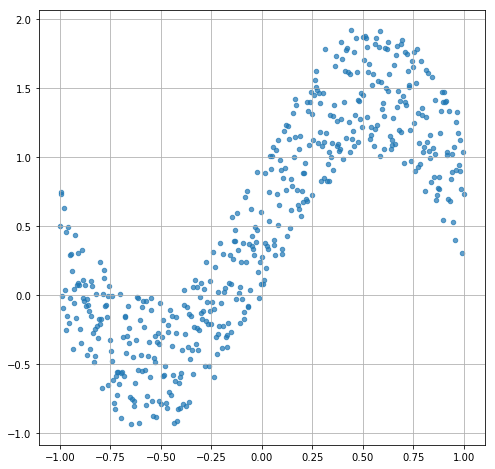

In [3]:
# рисуем исходные данные
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.grid()
plt.show()

In [4]:
# масщтабруем признаки в [-1,1]
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

In [5]:
# собираем полином

n=3 # степень полинома

poly = PolynomialFeatures(n)
Xp = poly.fit_transform(X)
Xp.shape

(500, 4)

In [6]:
# инициализация параметров

n_param = Xp.shape[1]

# T = np.random.rand(n_param)
T = np.array( [0] + [1]*(n_param-1) )
T.shape

(4,)

In [7]:
%%time

# метод градиентного спуска

a=0.9 # скорость обучени

MAX_ITER = 1000 # максимальное число циклов обучения
MIN_ERROR = 0.05 # порог минимальной ошибки

ex_count_div = 1.0/(2.0*Xp.shape[0])
er_hist=[] 

for i in range(MAX_ITER):
    O = Xp.dot(T) # выход
    E = O - y # ошибка
    er = ex_count_div*E.dot(E.T) # средняя квадратичная ошибка
    er_hist.append(er)
    if er < MIN_ERROR: # проверяем достижение порога
        print('step %i/%i: error bound %.03f'%(i,MAX_ITER,er))
        break
  
    dT = ex_count_div*Xp.T.dot(E) # изменение весов

    T = T - a*dT # корректируем параметры

step 165/1000: error bound 0.050
CPU times: user 6.59 ms, sys: 325 µs, total: 6.92 ms
Wall time: 11.1 ms


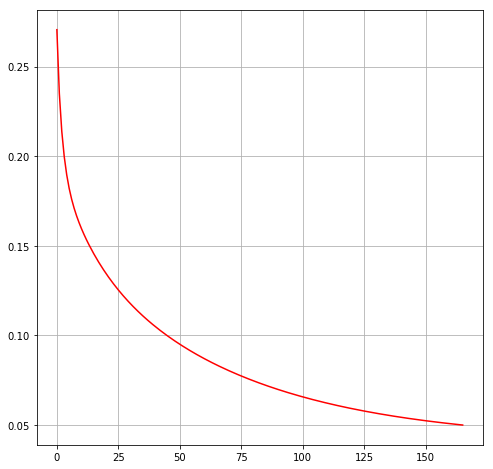

In [8]:
# рисуем изменение ф-ции потери
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.plot(range(len(er_hist)),er_hist,'-r')
plt.grid()
plt.show()

In [9]:
print(T)
print(er)

[ 0.47417916  1.9615258   0.06922337 -1.50029787]
0.04994430124914074


In [10]:
# вектор-столбец крайние значения признака

m=100
xx = np.linspace(X.min(),X.max(),m).reshape((m,1))
xxp = poly.transform(xx) # строим полином

# значение регрессии для xxp
yy = xxp.dot(T)


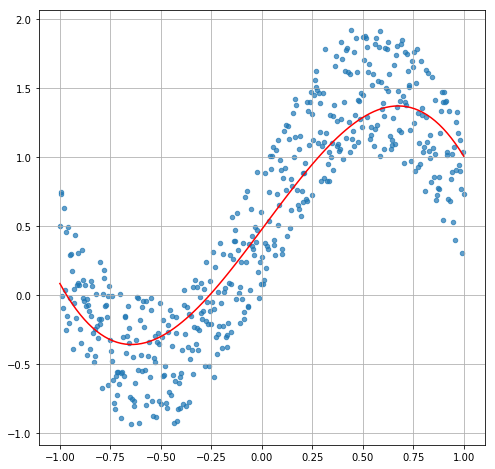

In [11]:
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.plot(xx,yy,'-r') # линия регрессии
plt.grid()
plt.show()